<a href="https://colab.research.google.com/github/Preman24/Diet-weight-analyze-and-prediction/blob/main/Personal_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This dataset is from kaggle and includes information from 100 participants, focusing on demographics, dietary habits, physical activity levels, and lifestyle factors to predict weight change over time. Key features comprise age, gender, current weight, daily caloric intake, macronutrient breakdown, sleep quality, and stress levels. The dataset aims to analyze how these variables interact and influence weight fluctuations, serving as a valuable resource for researchers and practitioners in nutrition and health. The analyses conducted include descriptive, inferential, and predictive analyses using machine learning models.

# Libaraies

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split



In [125]:
 df = pd.read_csv('/content/weight_change_dataset.csv')

df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [126]:
# dropping participant ID
try:
  df = df.drop(['Participant ID'],axis=1)
except Exception as e:
  print('The column(s) is already Dropped')

#Describe Dataset

In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100.0,37.910000,12.219454,18.000000,26.750000,38.00,46.250,59.0
Current Weight (lbs),100.0,171.533000,30.333856,100.000000,153.650000,172.15,192.475,238.2
BMR (Calories),100.0,2518.206000,364.431221,1566.500000,2255.050000,2519.50,2805.975,3390.8
Daily Calories Consumed,100.0,3518.292000,513.313097,2030.900000,3233.300000,3636.05,4000.000,4000.0
Daily Caloric Surplus/Deficit,100.0,1000.091000,371.560827,82.500000,766.950000,1013.10,1253.325,1922.5
Weight Change (lbs),100.0,-2.779817,7.443719,-35.678115,-5.012312,0.10,1.850,5.0
Duration (weeks),100.0,6.920000,3.515277,1.000000,4.000000,7.00,10.000,12.0
Stress Level,100.0,4.810000,2.576879,1.000000,2.750000,5.00,7.000,9.0
Final Weight (lbs),100.0,168.750000,30.588004,98.200000,149.550000,169.80,188.300,232.5


In [128]:
print(f' There are {len(df)} rows and {len(df.columns)} columns in this dataset')

 There are 100 rows and 12 columns in this dataset


# Descriptive Analysis

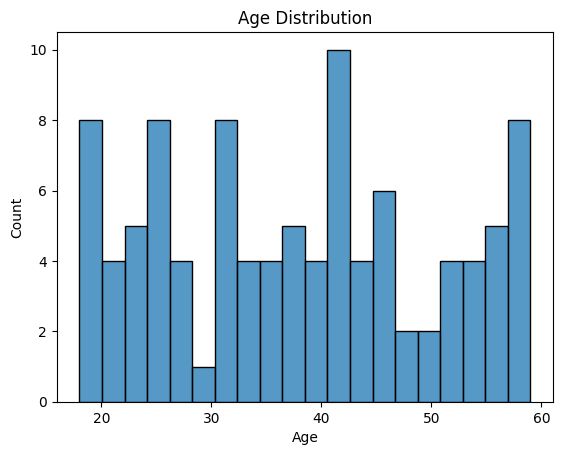

In [129]:
# Age distribution
sns.histplot(data=df, x='Age',bins=10,binwidth=2)
plt.title('Age Distribution')
plt.show()

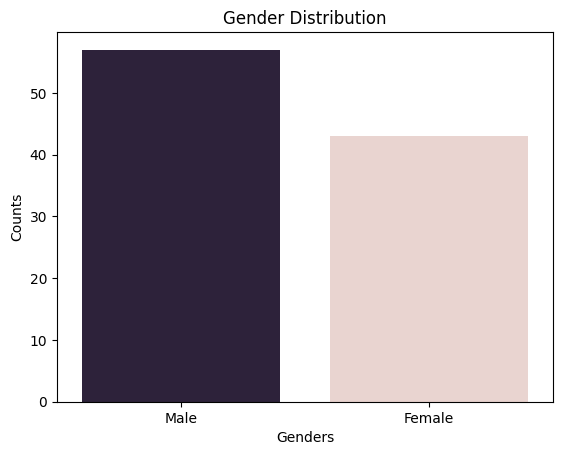

In [130]:
# Gender Distribution
Gender = df['Gender'].value_counts()
sns.barplot(x=['Male','Female'],y=Gender.values,hue=Gender.values,legend=False)
plt.title('Gender Distribution')
plt.xlabel('Genders')
plt.ylabel('Counts')
plt.show()

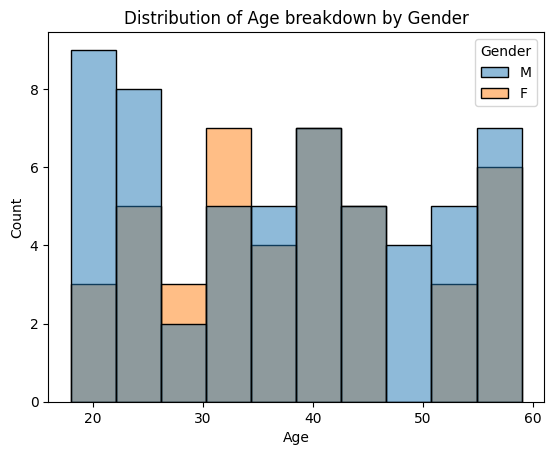

In [131]:
# Age and Gender
sns.histplot(data=df,x='Age',hue='Gender',bins=10)
plt.title('Distribution of Age breakdown by Gender')
plt.show()

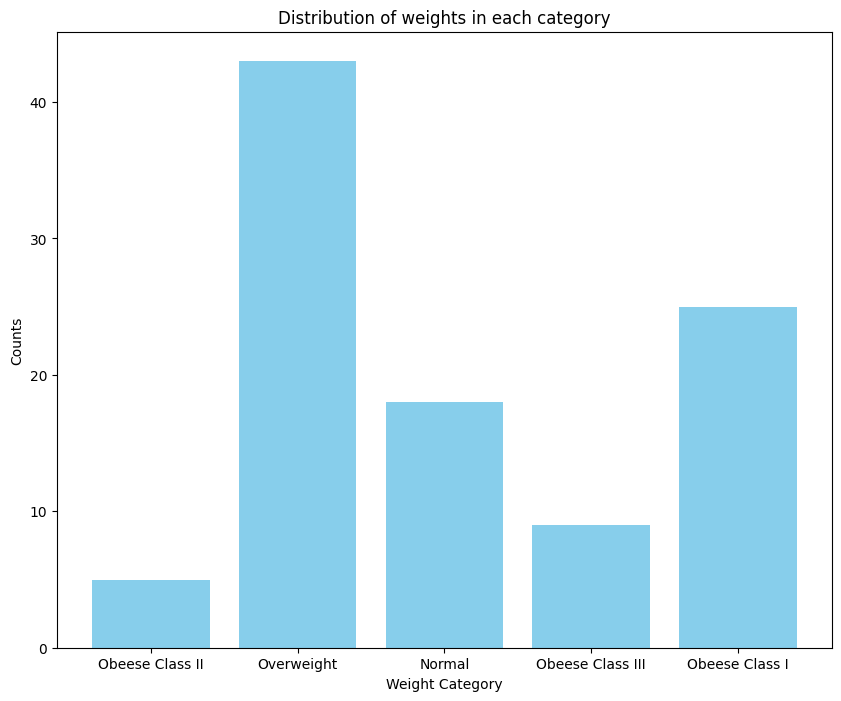

In [132]:
# Weight distribution
# Assuming the heights are between 168 to 170 cm
weight_categorized = []
for i in df['Current Weight (lbs)']:
  if 118 <= i <= 153:
    weight_categorized.append('Normal')
  elif 154 <= i <= 185:
    weight_categorized.append('Overweight')
  elif 186 <= i <= 217:
    weight_categorized.append('Obeese Class I')
  elif 218 <= i <= 249:
    weight_categorized.append('Obeese Class II')
  else:
    weight_categorized.append('Obeese Class III')

cate_count = Counter(weight_categorized)

plt.figure(figsize=(10,8))

plt.bar(cate_count.keys(),cate_count.values(),color='skyblue')
plt.title('Distribution of weights in each category')
plt.xlabel('Weight Category')
plt.ylabel('Counts')
plt.show()

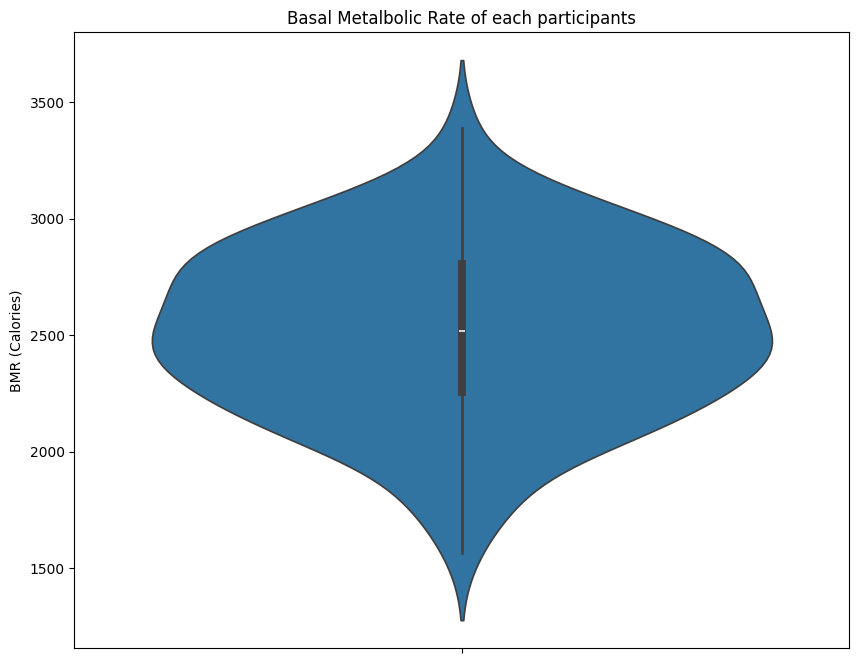

In [133]:
# Basal Metalbolic Rate of each participants
plt.figure(figsize=(10,8))
sns.violinplot(y='BMR (Calories)',data=df)
plt.title('Basal Metalbolic Rate of each participants')
plt.show()

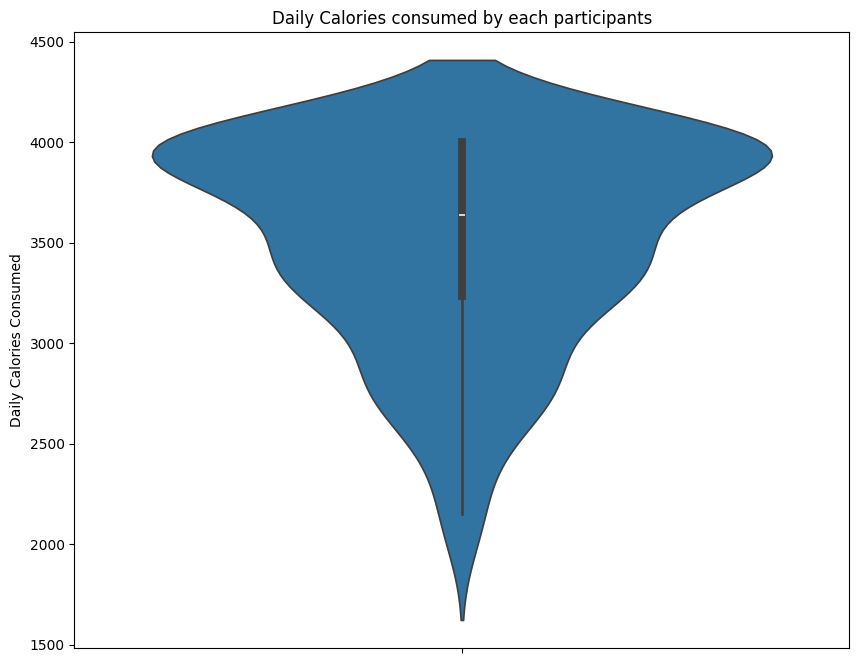

In [134]:
# Daily Calories consumed by each participants
plt.figure(figsize=(10,8))
sns.violinplot(y='Daily Calories Consumed',data=df)
plt.title('Daily Calories consumed by each participants')
plt.show()

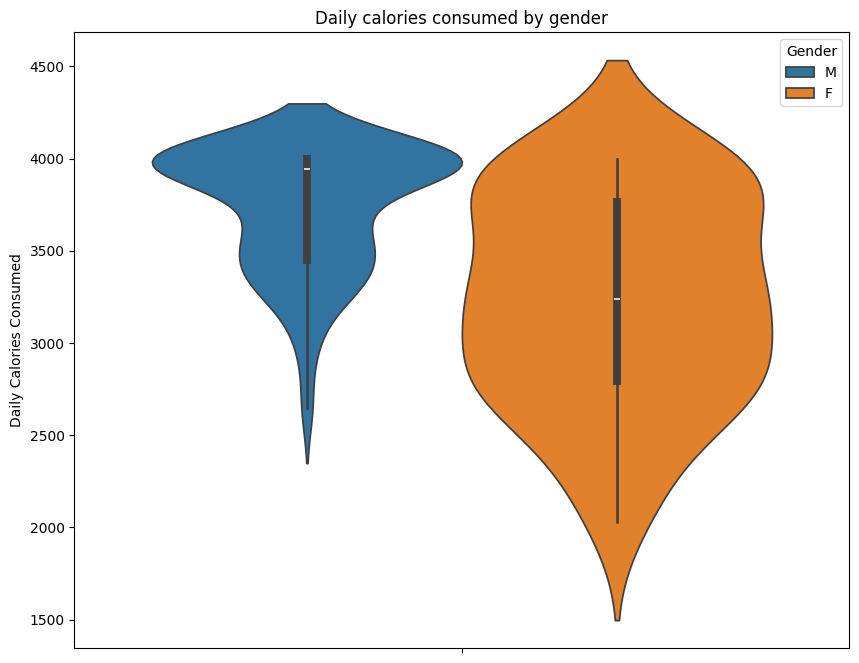

In [135]:
# Daily calorie consumption by each gender
plt.figure(figsize=(10,8))
sns.violinplot(y='Daily Calories Consumed',data=df,hue='Gender')
plt.title('Daily calories consumed by gender')
plt.show()

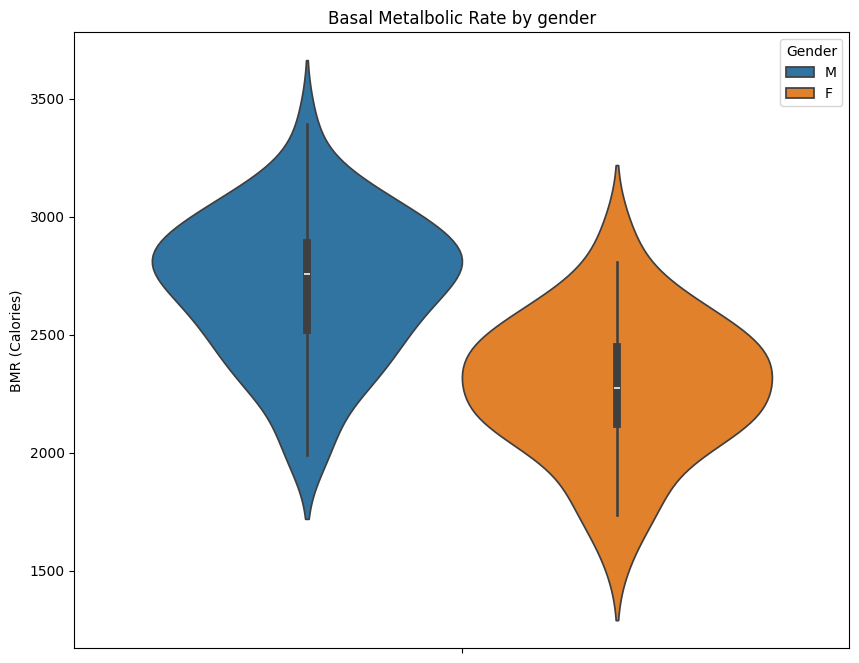

In [136]:
# Basal Metalbolic Rate of each participants
plt.figure(figsize=(10,8))
sns.violinplot(y='BMR (Calories)',data=df, hue='Gender')
plt.title('Basal Metalbolic Rate by gender')
plt.show()

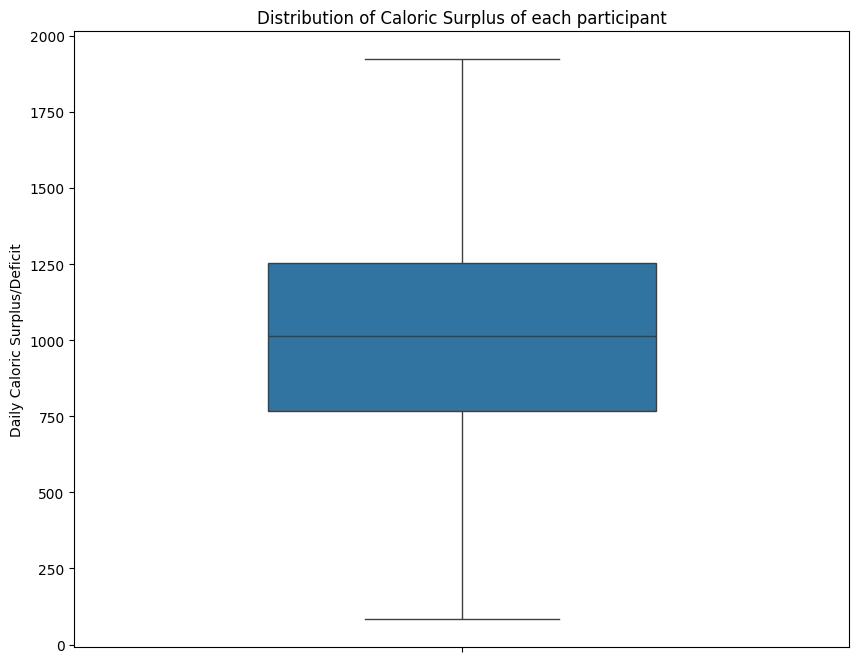

In [137]:
# Daily Caloric Surplus/Deficit
plt.figure(figsize=(10,8))
sns.boxplot(y='Daily Caloric Surplus/Deficit',data=df,width=.5)
plt.title('Distribution of Caloric Surplus of each participant')
plt.show()

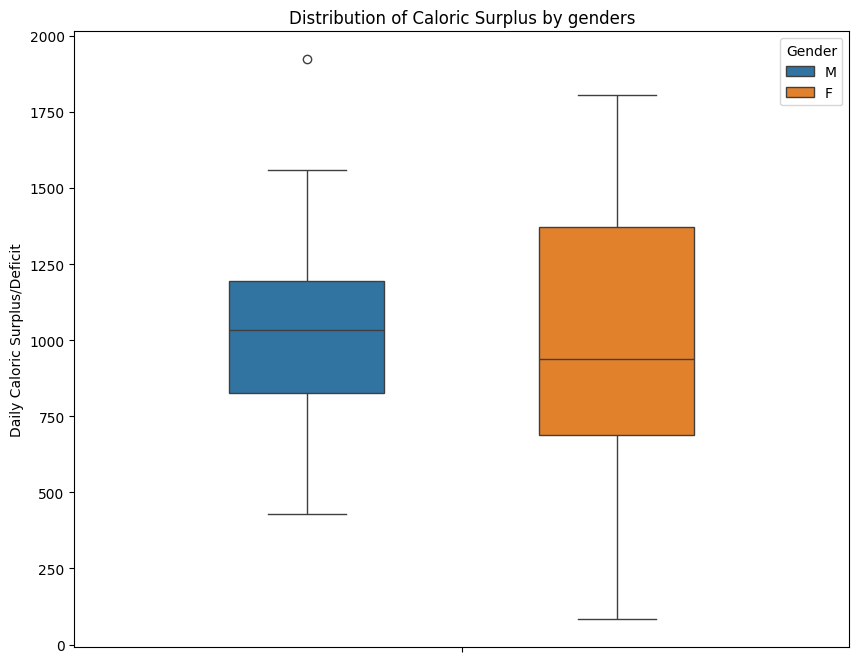

In [138]:
# Daily Caloric Surplus/Deficit by gender
plt.figure(figsize=(10,8))
sns.boxplot(y='Daily Caloric Surplus/Deficit',data=df, hue='Gender',gap=.5)
plt.title('Distribution of Caloric Surplus by genders')
plt.show()

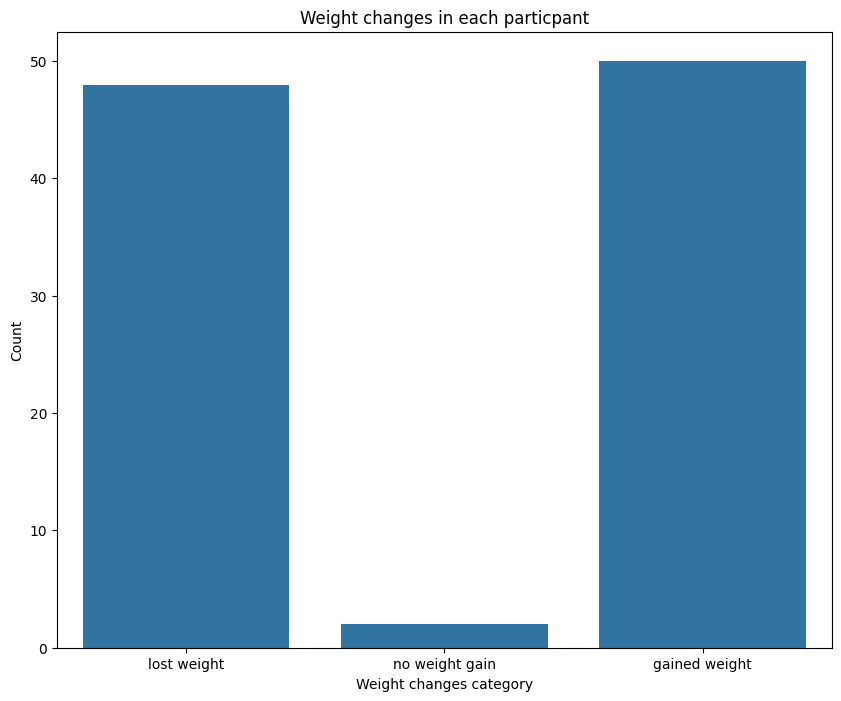

In [139]:
# Weight changes in each participants
df_weight_change = {'lost weight': 0,
                    'no weight gain': 0,
                    'gained weight': 0}

for i in df['Weight Change (lbs)']:
  if i == 0:
    df_weight_change['no weight gain'] += 1
  elif i > 0:
    df_weight_change['gained weight'] += 1
  else:
    df_weight_change['lost weight'] += 1

plt.figure(figsize=(10,8))
sns.barplot(x=df_weight_change.keys(),y=df_weight_change.values())
plt.title('Weight changes in each particpant')
plt.xlabel('Weight changes category')
plt.ylabel('Count')
plt.show()

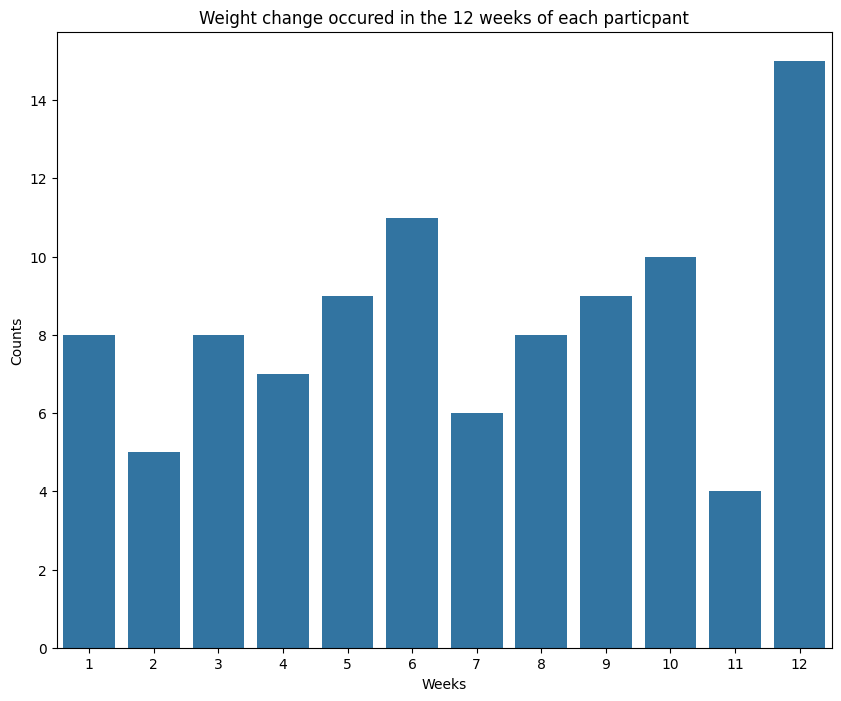

In [140]:
#weight change of each participant in the 12 weeks
Duration_df = {str(i): 0 for i in range(1,13)}

for i in df['Duration (weeks)']:
  Duration_df[str(i)] += 1

plt.figure(figsize=(10,8))
sns.barplot(x=Duration_df.keys(),y=Duration_df.values())
plt.title('Weight change occured in the 12 weeks of each particpant')
plt.xlabel('Weeks')
plt.ylabel('Counts')
plt.show()

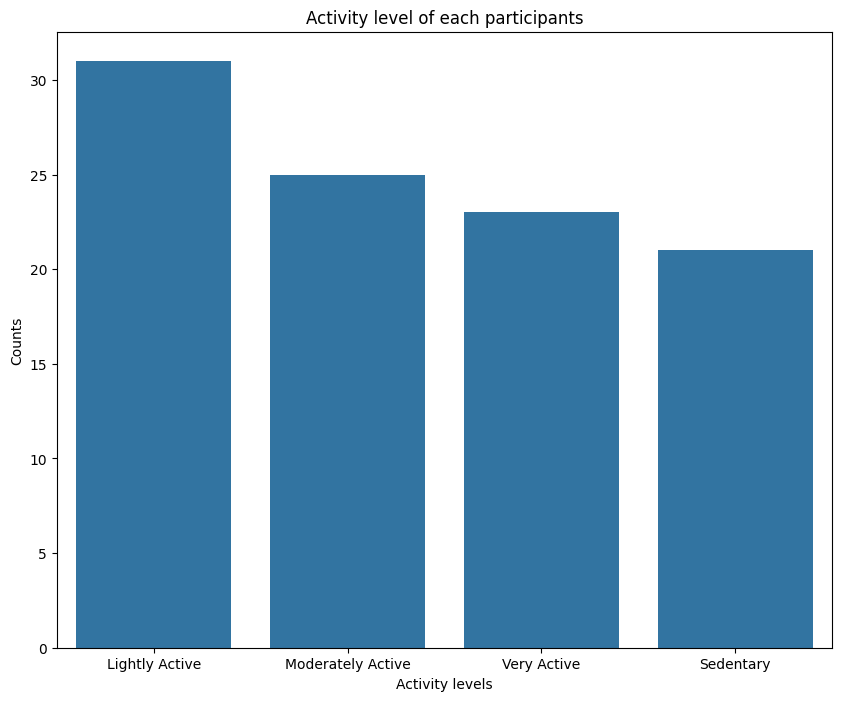

In [141]:
# Physical Activity level of each participant
activity_level = df['Physical Activity Level'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=['Lightly Active','Moderately Active','Very Active','Sedentary'],y=activity_level.values)
plt.title('Activity level of each participants')
plt.xlabel('Activity levels')
plt.ylabel('Counts')
plt.show()

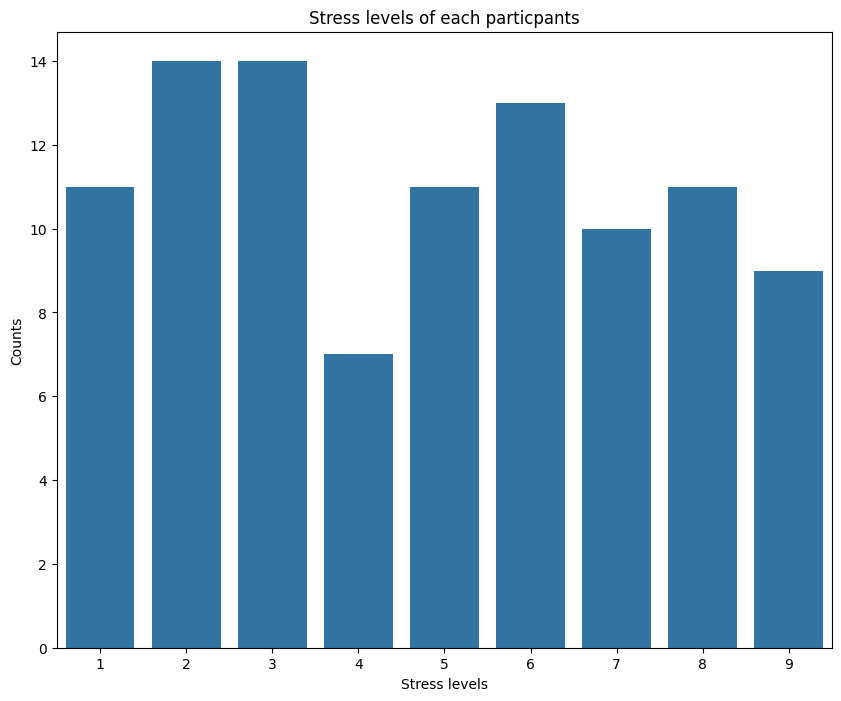

In [142]:
# Stress levels of each particpants
stress_level = df['Stress Level'].value_counts()
stress_df = {str(i): 0 for i in range(1,10)}

for i in df['Stress Level']:
  stress_df[str(i)] += 1

plt.figure(figsize=(10,8))
sns.barplot(x=stress_df.keys(), y = stress_df.values())
plt.title('Stress levels of each particpants')
plt.xlabel('Stress levels')
plt.ylabel('Counts')
plt.show()

## Inferential Analysis (Weight change as target variable)

In [143]:
weight_changes = []
for i in df['Weight Change (lbs)']:
  if i == 0:
    weight_changes.append('No change')
  elif i > 0:
    weight_changes.append('Gain')
  elif i < 0:
    weight_changes.append('loss')

threshold = 0.05




In [144]:
print('T-test based on the sleep quality comparing current and final weight change')
print('********************************************************************************')
print()

print("Excellent Assumption:")
print()
Excellent_df = df[df['Sleep Quality'] == 'Excellent']
t_stat, p_value = stats.ttest_rel(Excellent_df['Current Weight (lbs)'], Excellent_df['Final Weight (lbs)'])
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


print()
print("H0: There is no relationship between weight change and Excellent sleep quality")
print("H1: There is relationship between weight change and Excellent sleep quality")
print()

if p_value > threshold:
    print("""Since the p-value is larger than the alpha value (0.05), there is no significant difference between
current and final weight for Excellent sleep quality. Hence, we don't reject H0.""")
else:
    print("""Since the p-value is larger than the alpha value (0.05), there is significant difference between
current and final weight for Excellent sleep quality. Hence, we reject H0.""")
print()

print("---------------------------------------------------------------------------------------------")
print('Good assumption:')
print()
Good_df = df[df['Sleep Quality'] == 'Good']
t_stat, p_value = stats.ttest_rel(Good_df['Current Weight (lbs)'], Good_df['Final Weight (lbs)'])
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


print()
print("H0: There is no relationship between weight change and Good sleep quality")
print("H1: There is relationship between weight change and Good sleep quality")
print()

if p_value > threshold:
    print("""Since the p-value is larger than the alpha value (0.05), there is no significant difference between
current and final weight for Good sleep quality. Hence, we don't reject H0.""")
else:
    print("""Since the p-value is larger than the alpha value (0.05), there is significant difference between
current and final weight for Good sleep quality. Hence, we reject H0.""")
print()


print("---------------------------------------------------------------------------------------------")
print('Fair assumption:')
print()
Fair_df = df[df['Sleep Quality'] == 'Fair']
t_stat, p_value = stats.ttest_rel(Fair_df['Current Weight (lbs)'], Fair_df['Final Weight (lbs)'])
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


print()
print("H0: There is no relationship between weight change and Fair sleep quality")
print("H1: There is relationship between weight change and Fair sleep quality")
print()

if p_value > threshold:
    print("""Since the p-value is larger than the alpha value (0.05), there is no significant difference between
current and final weight for Fair sleep quality. Hence, we don't reject H0.""")
else:
    print("""Since the p-value is larger than the alpha value (0.05), there is significant difference between
current and final weight for Fair sleep quality. Hence, we reject H0.""")
print()

print("---------------------------------------------------------------------------------------------")
print('Bad assumption:')
print()
Bad_df = df[df['Sleep Quality'] == 'Bad']
t_stat, p_value = stats.ttest_rel(Bad_df['Current Weight (lbs)'], Bad_df['Final Weight (lbs)'])
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


print()
print("H0: There is no relationship between weight change and Bad sleep quality")
print("H1: There is relationship between weight change and Bad sleep quality")
print()

if p_value > threshold:
    print("""Since the p-value is larger than the alpha value (0.05), there is no significant difference between
current and final weight for Bad sleep quality. Hence, we don't reject H0.""")
else:
    print("""Since the p-value is larger than the alpha value (0.05), there is significant difference between
current and final weight for Bad sleep quality. Hence, we reject H0.""")





T-test based on the sleep quality comparing current and final weight change
********************************************************************************

Excellent Assumption:

T-statistic: -2.6345
P-value: 0.0188

H0: There is no relationship between weight change and Excellent sleep quality
H1: There is relationship between weight change and Excellent sleep quality

Since the p-value is larger than the alpha value (0.05), there is significant difference between
current and final weight for Excellent sleep quality. Hence, we reject H0.

---------------------------------------------------------------------------------------------
Good assumption:

T-statistic: -1.1630
P-value: 0.2579

H0: There is no relationship between weight change and Good sleep quality
H1: There is relationship between weight change and Good sleep quality

Since the p-value is larger than the alpha value (0.05), there is no significant difference between
current and final weight for Good sleep quality. Hence, 

In [145]:
print('T-test based on the physcial activity level comparing current and final weight change')
print('********************************************************************************')
print()

print("Sedentary Assumption:")
print()
Sedentary_df = df[df['Physical Activity Level'] == 'Sedentary']
t_stat, p_value = stats.ttest_rel(Sedentary_df['Current Weight (lbs)'], Sedentary_df['Final Weight (lbs)'])
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


print()
print("H0: There is no relationship between weight change and Sedentary Physical Activity Level")
print("H1: There is relationship between weight change and Sedentary Physical Activity Level")
print()

if p_value > threshold:
    print("""Since the p-value is larger than the alpha value (0.05), there is no significant difference between
current and final weight for Sedentary Physical Activity Level. Hence, we don't reject H0.""")
else:
    print("""Since the p-value is larger than the alpha value (0.05), there is significant difference between
current and final weight for Sedentary Physical Activity Level. Hence, we reject H0.""")
print()

print("---------------------------------------------------------------------------------------------")
print("Very Active Assumption:")
print()
Very_Active_df = df[df['Physical Activity Level'] == 'Very Active']
t_stat, p_value = stats.ttest_rel(Very_Active_df['Current Weight (lbs)'], Very_Active_df['Final Weight (lbs)'])
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


print()
print("H0: There is no relationship between weight change and Very Active Physical Activity Level")
print("H1: There is relationship between weight change and Very Active Physical Activity Level")
print()

if p_value > threshold:
    print("""Since the p-value is larger than the alpha value (0.05), there is no significant difference between
current and final weight for Very Active Physical Activity Level. Hence, we don't reject H0.""")
else:
    print("""Since the p-value is larger than the alpha value (0.05), there is significant difference between
current and final weight for Very Active Physical Activity Level. Hence, we reject H0.""")
print()


print("---------------------------------------------------------------------------------------------")
print("Lightly Active Assumption:")
print()
Lightly_Active_df = df[df['Physical Activity Level'] == 'Lightly Active']
t_stat, p_value = stats.ttest_rel(Lightly_Active_df['Current Weight (lbs)'], Lightly_Active_df['Final Weight (lbs)'])
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


print()
print("H0: There is no relationship between weight change and Lightly Active Physical Activity Level")
print("H1: There is relationship between weight change and Lightly Active Physical Activity Level")
print()

if p_value > threshold:
    print("""Since the p-value is larger than the alpha value (0.05), there is no significant difference between
current and final weight for Lightly Active Physical Activity Level. Hence, we don't reject H0.""")
else:
    print("""Since the p-value is larger than the alpha value (0.05), there is significant difference between
current and final weight for Lightly Active Physical Activity Level. Hence, we reject H0.""")
print()

print("---------------------------------------------------------------------------------------------")
print("Moderately Active Assumption:")
print()
Moderately_Active_df = df[df['Physical Activity Level'] == 'Moderately Active']
t_stat, p_value = stats.ttest_rel(Moderately_Active_df['Current Weight (lbs)'], Moderately_Active_df['Final Weight (lbs)'])
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


print()
print("H0: There is no relationship between weight change and Moderately Active Physical Activity Level")
print("H1: There is relationship between weight change and Moderately Active Physical Activity Level")
print()

if p_value > threshold:
    print("""Since the p-value is larger than the alpha value (0.05), there is no significant difference between
current and final weight for Moderately Active Physical Activity Level. Hence, we don't reject H0.""")
else:
    print("""Since the p-value is larger than the alpha value (0.05), there is significant difference between
current and final weight for Moderately Active Physical Activity Level. Hence, we reject H0.""")
print()




T-test based on the physcial activity level comparing current and final weight change
********************************************************************************

Sedentary Assumption:

T-statistic: 1.6455
P-value: 0.1155

H0: There is no relationship between weight change and Sedentary Physical Activity Level
H1: There is relationship between weight change and Sedentary Physical Activity Level

Since the p-value is larger than the alpha value (0.05), there is no significant difference between
current and final weight for Sedentary Physical Activity Level. Hence, we don't reject H0.

---------------------------------------------------------------------------------------------
Very Active Assumption:

T-statistic: 1.6653
P-value: 0.1100

H0: There is no relationship between weight change and Very Active Physical Activity Level
H1: There is relationship between weight change and Very Active Physical Activity Level

Since the p-value is larger than the alpha value (0.05), there is no

In [146]:
print("Chi2 square test on sleep quality and weight changes")
print("---------------------------------------------------------------------------")
contingency_table = pd.crosstab(df['Sleep Quality'],weight_changes)
print("Contingency table:")
print(contingency_table)
print()
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

print()
print("H0: There is no relationship between sleep quailty and weight changes")
print("H1: There is relationship between sleep quailty and weight changes")

print()
if p_value > threshold:
    print("""Since the p-value is smaller than the alpha value (0.05), there is insufficient evidence to prove
that there is a relationship between gender and weight change. Hence, we don't reject H0.""")
else:
    print("""Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between sleep quality and weight change. Hence, we reject H0.""")


Chi2 square test on sleep quality and weight changes
---------------------------------------------------------------------------
Contingency table:
col_0          Gain  No change  loss
Sleep Quality                       
Excellent        14          1     1
Fair             18          1     5
Good             18          0     4
Poor              0          0    38


Chi-square Statistic: 69.1450
P-value: 0.0000
Degrees of Freedom: 6
Expected Frequencies: 
[[ 8.    0.32  7.68]
 [12.    0.48 11.52]
 [11.    0.44 10.56]
 [19.    0.76 18.24]]

H0: There is no relationship between sleep quailty and weight changes
H1: There is relationship between sleep quailty and weight changes

Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between sleep quality and weight change. Hence, we reject H0.


In [147]:
print("Chi2 square test on gender and weight changes")
print("---------------------------------------------------------------------------")
contingency_table = pd.crosstab(df['Gender'],weight_changes)
print("Contingency table:")
print(contingency_table)
print()
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

print()
print("H0: There is no relationship between weight change and gender")
print("H1: There is relationship between weight change and gender")

print()
if p_value > threshold:
    print("""Since the p-value is smaller than the alpha value (0.05), there is insufficient evidence to prove
that there is a relationship between gender and weight change. Hence, we don't reject H0.""")
else:
    print("""Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between gender and weight change. Hence, we reject H0.""")


Chi2 square test on gender and weight changes
---------------------------------------------------------------------------
Contingency table:
col_0   Gain  No change  loss
Gender                       
F         20          2    21
M         30          0    27


Chi-square Statistic: 2.8458
P-value: 0.2410
Degrees of Freedom: 2
Expected Frequencies: 
[[21.5   0.86 20.64]
 [28.5   1.14 27.36]]

H0: There is no relationship between weight change and gender
H1: There is relationship between weight change and gender

Since the p-value is smaller than the alpha value (0.05), there is insufficient evidence to prove
that there is a relationship between gender and weight change. Hence, we don't reject H0.


In [148]:
print("Chi2 square test on age and weight changes")
print("---------------------------------------------------------------------------")
contingency_table = pd.crosstab(df['Age'],weight_changes)
print("Contingency table:")
print(contingency_table)
print()
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

print()
print("H0: There is no relationship between weight change and age")
print("H1: There is relationship between weight change and age")

print()
if p_value > threshold:
    print("""Since the p-value is smaller than the alpha value (0.05), there is insufficient evidence to prove
that there is a relationship between gender and weight change. Hence, we don't reject H0.""")
else:
    print("""Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between gender and weight change. Hence, we reject H0.""")


Chi2 square test on age and weight changes
---------------------------------------------------------------------------
Contingency table:
col_0  Gain  No change  loss
Age                         
18        0          0     2
19        2          0     2
20        0          0     2
21        1          0     2
22        1          0     0
23        1          0     0
24        1          0     3
25        4          0     1
26        1          0     2
27        1          0     0
28        0          1     2
29        1          0     0
31        3          0     1
32        3          0     1
33        1          0     1
34        0          0     2
35        1          0     2
36        0          0     1
37        0          0     1
38        3          0     1
39        1          0     1
40        0          0     2
41        0          0     6
42        4          0     0
43        3          0     0
44        1          0     0
45        3          0     0
46        1          

In [149]:
print("Chi2 square test on physical activity level and weight changes")
print("---------------------------------------------------------------------------")
contingency_table = pd.crosstab(df['Physical Activity Level'],weight_changes)
print("Contingency table:")
print(contingency_table)
print()
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

print()
print("H0: There is no relationship between weight change and physical activity")
print("H1: There is relationship between weight change and physical activity")

print()
if p_value > threshold:
    print("""Since the p-value is smaller than the alpha value (0.05), there is insufficient evidence to prove
that there is a relationship between gender and weight change. Hence, we don't reject H0.""")
else:
    print("""Since the p-value is larger than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between gender and weight change. Hence, we reject H0.""")


Chi2 square test on physical activity level and weight changes
---------------------------------------------------------------------------
Contingency table:
col_0                    Gain  No change  loss
Physical Activity Level                       
Lightly Active             18          0    13
Moderately Active          11          0    14
Sedentary                  11          2     8
Very Active                10          0    13


Chi-square Statistic: 9.6745
P-value: 0.1390
Degrees of Freedom: 6
Expected Frequencies: 
[[15.5   0.62 14.88]
 [12.5   0.5  12.  ]
 [10.5   0.42 10.08]
 [11.5   0.46 11.04]]

H0: There is no relationship between weight change and physical activity
H1: There is relationship between weight change and physical activity

Since the p-value is smaller than the alpha value (0.05), there is insufficient evidence to prove
that there is a relationship between gender and weight change. Hence, we don't reject H0.


## Model Building (Neural Network)

In [150]:

scaler = StandardScaler()
encode = LabelEncoder()


# change the varaibale y ('Final Weight (lbs)') into 3 values based on the weight changes from current to final
mapping = {
    'Gain': 1,
    'loss': -1,
    'No change': 0
}
numeric_weight_data = [mapping[item] for item in weight_changes]
df['Final Weight (lbs)'] = numeric_weight_data


# Switch the data types that are object into numerical using label encoder
for column in df:
  if df[column].dtype == 'object':
    df[column] = encode.fit_transform(df[column])


# Drop final weight (y) to make the dataset for X
X = df.drop(['Final Weight (lbs)'],axis=1)
X = scaler.fit_transform(X)



# Extract only final weight (y) for target variable and one hot encode them based on the multi class variable
y = df['Final Weight (lbs)'].values
y = y.reshape(-1,1)
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False for dense output
y = encoder.fit_transform(y)



In [151]:
# Split dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(80, 11) (20, 11) (80, 3) (20, 3)


In [152]:
# Model building for neural network
model = Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
# Train model
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4859 - loss: 1.0216
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5766 - loss: 0.9943 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6727 - loss: 0.8841 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7117 - loss: 0.8432 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7602 - loss: 0.7815 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8031 - loss: 0.7219 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8492 - loss: 0.6735 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8969 - loss: 0.6059 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9250 - loss: 0.5606 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9172 - loss: 0.5632 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9156 - loss: 0.5136 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9102 - loss: 0.4970 
Ep

In [154]:
# Predict trained model on test dataset
loss, accuracy = model.evaluate(X_test, y_test)
print("Prediciting test set based on trained dataset using neural network")
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.9500 - loss: 0.1278
Prediciting test set based on trained dataset using neural network
Test Loss: 0.1278
Test Accuracy: 0.9500
